In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
carseats = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [3]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
carseats.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [5]:
print(carseats)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

In [6]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
from patsy import dmatrices
y,x = dmatrices('Sales ~ Price + Urban +  US ', data=carseats, return_type='dataframe')
mod=sm.OLS(y,x)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        14:55:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

---- So, we can reject the null hypothesis for price and US

In [14]:
from patsy import dmatrices
y,x = dmatrices('Sales ~ Price + Urban +  US +CompPrice+Income+Advertising+Population', data=carseats, return_type='dataframe')
mod=sm.OLS(y,x)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     50.86
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.61e-51
Time:                        15:42:15   Log-Likelihood:                -853.12
No. Observations:                 400   AIC:                             1722.
Df Residuals:                     392   BIC:                             1754.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1192      0.956      4.310   

In [9]:
y,x = dmatrices('Sales ~ Price  +  US ', data=carseats, return_type='dataframe')
mod=sm.OLS(y,x)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        15:08:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

The standard error decreases and adj r2 increases as we remove the Urban predictor.
As, standard error decreases, it indicates a better fit of model

In [11]:
res.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


Text(0, 0.5, 'sales')

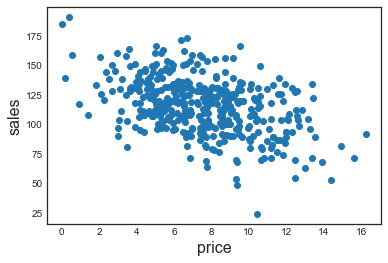

In [16]:
plt.scatter(carseats.Sales,carseats.Price)
plt.xlabel("price",fontsize=16)
plt.ylabel("sales",fontsize=16)

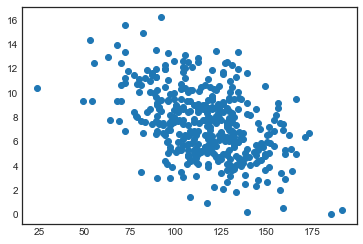

In [23]:
regr = skl_lm.LinearRegression()
x= carseats.Price.values.reshape(-1,1)
y=carseats.Sales
regr.fit(x,y)
plt.scatter(x,y)

In [24]:
# Compute leverage values
design_mat = np.append(np.ones((x.shape[0], 1)), x, axis = 1)
hat_mat = design_mat @ np.linalg.inv(design_mat.T @ design_mat) @ design_mat.T
leverage_vals = hat_mat.diagonal()

In [26]:
carseats['pred']=regr.predict(x)
carseats['residual'] = carseats.Sales - carseats.pred

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<AxesSubplot:xlabel='pred', ylabel='residual'>,)

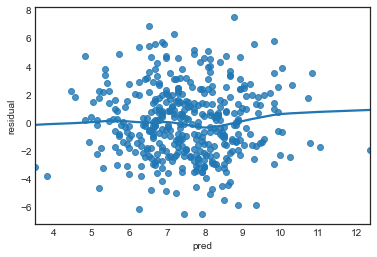

In [28]:
sns.regplot(carseats.pred, carseats.residual,lowess=True) ,
            
#LOWESS (Locally Weighted Scatterplot Smoothing), sometimes called
#LOESS (locally weighted smoothing), is a popular tool used in regression analysis that 
#creates a smooth line through a timeplot or scatter plot to help you to see relationship
#between variables and foresee trend

            
#LOWESS (Locally Weighted Scatterplot Smoothing), sometimes called LOESS (locally weighted smoothing), is a popular tool used in regression analysis that 
creates a smooth line through a timeplot or scatter plot to help you to see relationship between variables and foresee trend 

In [30]:
residual_standard_error = (np.sum(carseats.residual**2)/(design_mat.shape[0] - design_mat.shape[1]))**0.5
standardise_residuals = carseats.residual/(residual_standard_error*(1 - leverage_vals)**0.5)

Text(0, 0.5, 'standardised_residuals')

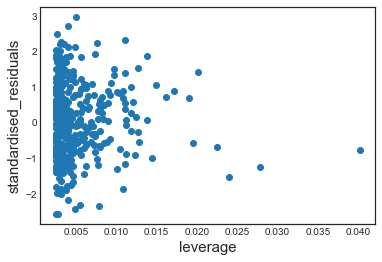

In [31]:
plt.scatter( leverage_vals ,standardise_residuals)
plt.xlabel("leverage",fontsize=15)
plt.ylabel("standardised_residuals",fontsize=15)

Text(0, 0.5, 'standardised_residuals')

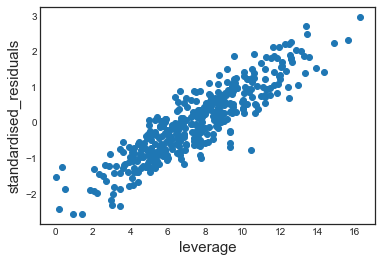

In [32]:
plt.scatter( carseats.Sales,standardise_residuals)
plt.xlabel("leverage",fontsize=15)
plt.ylabel("standardised_residuals",fontsize=15)